## Este Notebook versa algoritmos de regressao sobre Regressao Linear & Árvores de Decisao

In [132]:
# Importar as bibliotecas de funções
import numpy as np # para números
import pandas as pd # para estruturas de dados
from sklearn.model_selection import train_test_split # divisão de grupos de dados
from sklearn.linear_model import LinearRegression # sobre a regressao linear
from sklearn.ensemble import RandomForestRegressor # sobre algoritmo de arvore de decisao
from sklearn.metrics import mean_absolute_error, mean_squared_error # metricas de desempenho
import matplotlib.pyplot as plt # para graficos ou figuras

## O desafio é prever consumo de materiais ou itens. Os dados não estao disponiveis ainda. Faremos simulaçao.

In [133]:
# Gerando dados simulados - consumo de gasolina (litros) -- considerar aspectos meteorológicos
np.random.seed(42) # semente de dados aleatórios para fazer simulação
n_days = 90 # numero de dias analisados
days = np.arange(1, n_days + 1) # lista de numero de dias, gerados aleatoriamente.
temp_med = 20 # temperatura media
treino_limite = 72
temperature = temp_med + 10 * np.sin(days * 2 * np.pi / 30) + np.random.normal(0, 1, n_days)  # variação sazonal
# valor médio da temperatura = 20 graus Celsius
# sin = senoidal
# normal = distribuiçao de dados no formato de um 'sino', onde a media é o que mais aparece
# random = aleatorio
gasoline_consumption = 100 + 5 * temperature + np.random.normal(0, 5, n_days) # consumo de gasolina em litros
# valor central de 100 litros, junto com variacao de temperatura e variacao aletória, todos em litros.

In [134]:
# DataFrame com os dados simulados -- usando Dicionários
# Dataframe = estrutura de dados como se fosse uma tabela, com linhas e colunas, organizando os registros
# Dicionário = estrutura de dados, com correspondencia de significado
data = pd.DataFrame({'day': days, 'temperature': temperature, 'gasoline_consumption': gasoline_consumption})

In [135]:
data.head(3)

,day,temperature,gasoline_consumption
0,1,22.575831,213.364543
1,2,23.929102,224.488736
2,3,26.525541,229.117440


In [136]:
# Organizando os dados para fases de treino e de teste
X = data[['day', 'temperature']] # indicar os dados de entrada
y = data['gasoline_consumption'] # indicar os dados de saida
# train = treino
# test = teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)
X_train = X.iloc[:treino_limite]
X_test = X.iloc[treino_limite:]
y_train = y.iloc[:treino_limite]
y_test = y.iloc[treino_limite:]

In [137]:
X_train.head(3)

,day,temperature
0,1,22.575831
1,2,23.929102
2,3,26.525541


In [138]:
y_train.head(3)

,gasoline_consumption
0,213.364543
1,224.488736
2,229.117440


In [139]:
y_test.head(3)

,gasoline_consumption
72,225.950680
73,214.115391
74,191.718155


In [140]:
X_test.head(3)

,day,temperature
72,73,24.031540
73,74,23.643761
74,75,17.380255


In [141]:
# Modelos de Regressão Linear e Random Forest
# Random Forest = algoritmo de Machine Learning, baseado em arvores de decisao
linear_model = LinearRegression() # minimizar os erros em relação aos dados de saída
rf_model = RandomForestRegressor(n_estimators=100,
                                 random_state=42) # algoritmo arvore de decisao

In [142]:
# Treinando os modelos
# Preparacao das equações matematicas de acordo com os dados de treino
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [143]:
linear_model.coef_

array([0.00967862, 4.94663919])

In [144]:
rf_model.feature_importances_

array([0.00654039, 0.99345961])

In [145]:
# Prevendo nos dados de teste
# Aplicação dos modelos com os dados de teste
# Geracao de listas com dados de saida
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [146]:
linear_predictions

array([220.20961511, 218.30108683, 187.32746284, 194.07708922,
       180.61655013, 169.76073537, 164.01832539, 147.66385142,
       152.21249642, 152.92524417, 158.47902435, 150.76447407,
       153.54470466, 161.15015721, 175.85508841, 181.91863761,
       187.51672353, 202.97052472])

In [147]:
rf_predictions

array([218.43390404, 219.85990712, 191.96135105, 191.0477604 ,
       173.06347042, 167.99566375, 163.8952198 , 142.31580444,
       150.75935342, 151.29099669, 155.58699438, 150.19679711,
       152.11023855, 157.30235658, 173.38420267, 173.35540792,
       191.96135105, 199.67551119])

In [148]:
# Avaliando os modelos
# Avaliacao de acordo com os erros.
# Quanto menor o erro, melhor é o algoritmo
# O erro é definido pelo tipo de diferença entre os dados de testes e as previsoes
# MAE = mean absolute error. Mean = media. Absolute = o módulo
# MSE = mean squared error. Squared = quadrático
linear_mae = mean_absolute_error(y_test, linear_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

In [149]:
print("Linear Regression - MAE:", linear_mae, "MSE:", linear_mse)
print("Random Forest - MAE:", rf_mae, "MSE:", rf_mse)
# comando print serve para mostrar ou imprimir o que se precisa

Linear Regression - MAE: 4.08183669227809 MSE: 26.53638580389901
Random Forest - MAE: 5.65058810068153 MSE: 54.732067192997995


In [150]:
# Prevendo para os próximos 7 dias
future_days = np.arange(n_days + 1, n_days + 8)
future_temperature = temp_med + 10 * np.sin(future_days * 2 * np.pi / 30)  # mantendo padrão sazonal
future_data = pd.DataFrame({'day': future_days, 'temperature': future_temperature})

In [151]:
future_data.head(3)

,day,temperature
0,91,22.079117
1,92,24.067366
2,93,25.877853


In [152]:
linear_future_predictions = linear_model.predict(future_data)
linear_future_predictions = np.round(linear_future_predictions,2)
rf_future_predictions = rf_model.predict(future_data)
rf_future_predictions = np.round(rf_future_predictions,2)

In [153]:
linear_future_predictions # estimativas futuras do consumo de gasolina em litros

array([210.73, 220.57, 229.54, 237.23, 243.32, 247.53, 249.69])

In [154]:
# Resultados de previsão
print("Previsão de Consumo (Regressão Linear) para a próxima semana:", linear_future_predictions)
print("Previsão de Consumo (Random Forest) para a próxima semana:", rf_future_predictions)


Previsão de Consumo (Regressão Linear) para a próxima semana: [210.73 220.57 229.54 237.23 243.32 247.53 249.69]
Previsão de Consumo (Random Forest) para a próxima semana: [210.04 218.43 232.1  238.89 243.38 248.54 253.24]


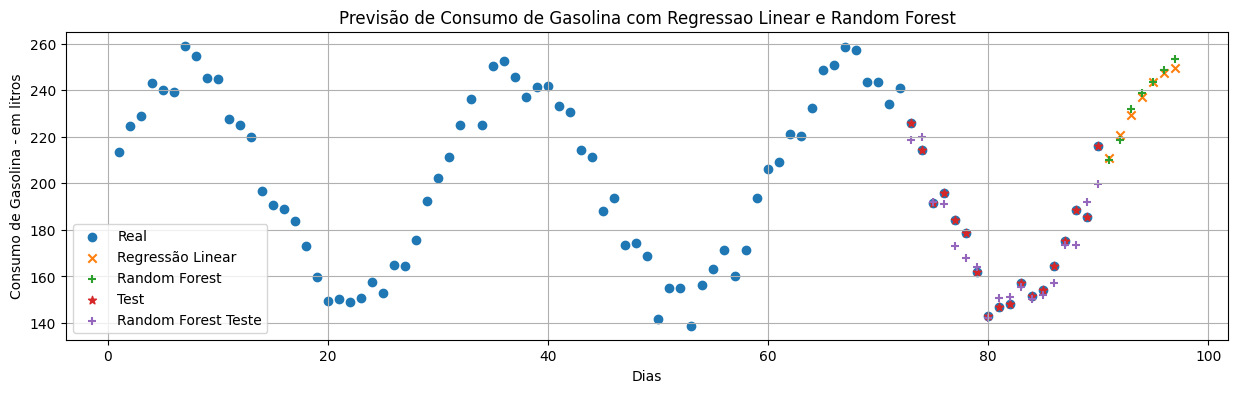

In [155]:
plt.figure(figsize=(15,4))  # tamanho da figura
plt.scatter(x = data['day'], y = data['gasoline_consumption'], label='Real', marker='o')
plt.scatter(x = future_data['day'], y = linear_future_predictions, label='Regressão Linear', marker='x')
plt.scatter(x = future_data['day'], y = rf_future_predictions, label='Random Forest', marker='+')
plt.scatter(x = X_test['day'], y = y_test, label='Test', marker='*')
plt.scatter(x = X_test['day'], y = rf_predictions, label='Random Forest Teste', marker='+')
plt.xlabel('Dias')
plt.ylabel('Consumo de Gasolina - em litros')
plt.grid(True)
plt.legend()
plt.title('Previsão de Consumo de Gasolina com Regressao Linear e Random Forest')
plt.show()